In [126]:
import spacy
import timeit
import math
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from collections import Counter
from lxml import etree
from glob import glob
from unicodedata import normalize

In [2]:
from termcolor import colored

In [3]:
print(colored('hello', 'cyan', attrs=['bold']), colored('world', 'red',attrs=['bold']))

hello world


In [4]:
nlp = spacy.load('fr_core_news_lg')

In [122]:
colette_sido_extract =  "– Et pourquoi cesserais-je d’être de mon village ? Il n’y faut pas compter. Te voilà bien fière, mon pauvre Minet-Chéri, parce que tu habites Paris depuis ton mariage. Je ne peux pas m’empêcher de rire en constatant combien tous les Parisiens sont fiers d’habiter Paris, les vrais parce qu’ils assimilent cela à un titre nobiliaire, les faux parce qu’ils s’imaginent avoir monté en grade. À ce compte-là, je pourrais me vanter que ma mère est née boulevard Bonne-Nouvelle ! Toi, te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un Parisien. Et quand je dis un Parisien… Les vrais Parisiens d’origine ont moins de caractère dans la physionomie. On dirait que Paris les efface !  Elle s’interrompait, levait le rideau de tulle qui voilait la fenêtre :  – Ah ! voici Mlle Thévenin qui promène en triomphe, dans toutes les rues, sa cousine de Paris. Elle n’a pas besoin de le dire, que cette dame Quériot vient de Paris : beaucoup de seins, les pieds petits, et des chevilles trop fragiles pour le poids du corps ; deux ou trois chaînes de cou, les cheveux très bien coiffés… Il ne m’en faut pas tant pour savoir que cette dame Quériot est caissière dans un grand café. Une caissière parisienne ne pare que sa tête et son buste, le reste ne voit guère le jour. En outre, elle ne marche pas assez et engraisse de l’estomac. Tu verras beaucoup, à Paris, ce modèle de femme-tronc.  Ainsi parlait ma mère, quand j’étais moi-même, autrefois, une très jeune femme. Mais elle avait commencé, bien avant mon mariage, de donner le pas à la province sur Paris. Mon enfance avait retenu des sentences, excommunicatoires le plus souvent, qu’elle lançait avec une force d’accent singulière. Où prenait-elle leur autorité, leur suc, elle qui ne quittait pas, trois fois l’an, son département ? D’où lui venait le don de définir, de pénétrer, et cette forme décrétale de l’observation ?  Ne l’eussé-je pas tenu d’elle, qu’elle m’eût donné, je crois, l’amour de la province, si par province on n’entend pas seulement un lieu, une région éloignés de la capitale, mais un esprit de caste, une pureté obligatoire des mœurs, l’orgueil d’habiter une demeure ancienne, honorée, close de partout, mais que l’on peut ouvrir à tout moment sur ses greniers aérés, son fenil empli, ses maîtres façonnés à l’usage et à la dignité de leur maison.  En vraie provinciale, ma charmante mère, « Sido », tenait souvent ses yeux de l’âme fixés sur Paris. Théâtres de Paris, modes, fêtes de Paris, ne lui étaient ni indifférents, ni étrangers. Tout au plus les aimait-elle d’une passion un peu agressive, rehaussée de coquetteries, bouderies, approches stratégiques et danses de guerre. Le peu qu’elle goûtait de Paris, tous les deux ans environ, l’approvisionnait pour le reste du temps. Elle revenait chez nous lourde de chocolat en barre, de denrées exotiques et d’étoffes en coupons, mais surtout de programmes de spectacles et d’essence à la violette, et elle commençait de nous peindre Paris dont tous les attraits étaient à sa mesure, puisqu’elle ne dédaignait rien.  En une semaine elle avait visité la momie exhumée, le musée agrandi, le nouveau magasin, entendu le ténor et la conférence sur la Musique birmane . Elle rapportait un manteau modeste, des bas d’usage, des gants très chers.  Surtout elle nous rapportait son regard gris voltigeant, son teint vermeil que la fatigue rougissait, elle revenait ailes battantes, inquiète de tout ce qui, privé d’elle, perdait la chaleur et le goût de vivre."

In [5]:
coef_fabula = pd.read_csv(r'results_svm/coefs_1000_fabula.csv', index_col='Unnamed: 0')

In [6]:
coef_fabula.sort_values(by = 'coefs', inplace=True)

In [7]:
coef_canon_df = coef_fabula[coef_fabula["coefs"] < -0.05]

In [8]:
coef_canon = list(coef_canon_df.index)

In [9]:
len(coef_canon)

291

In [10]:
coef_non_canon_df = coef_fabula[coef_fabula["coefs"] > 0.05]

In [11]:
coef_non_canon = list(coef_non_canon_df.index)

In [12]:
len(coef_non_canon)

330

In [13]:
def clean_text(txt):
    txt_res = normalize("NFKD", txt.replace('\xa0', ' '))
    txt_res = txt_res.replace('\\xa0', '')
    return txt_res

In [114]:
def close_reading_analysis(txt, list_canon, list_non_canon):
    list_res = []
    nb_canon, nb_non_canon = 0, 0
    text_clean = clean_text(str(txt).lower())
    docs = nlp(text_clean)
    for token in docs:
        if token.lemma_ in list_canon:
            list_res.append(colored(token.text, 'cyan', attrs=['blink']))
            nb_canon += 1
        elif token.lemma_ in list_non_canon:
            list_res.append(colored(token.text, 'red', attrs=['bold']))
            nb_non_canon +=1
        else:
            list_res.append(token.text)
    
    print("nb_canon = ", nb_canon, "\n nb_non_canon = ", nb_non_canon)
    return " ".join(list_res)

In [77]:
clean_text(colette_sido_extract)

'– Et pourquoi cesserais-je d’être de mon village ? Il n’y faut pas compter. Te voilà bien fière, mon pauvre Minet-Chéri, parce que tu habites Paris depuis ton mariage. Je ne peux pas m’empêcher de rire en constatant combien tous les Parisiens sont fiers d’habiter Paris, les vrais parce qu’ils assimilent cela à un titre nobiliaire, les faux parce qu’ils s’imaginent avoir monté en grade. À ce compte-là, je pourrais me vanter que ma mère est née boulevard Bonne-Nouvelle ! Toi, te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un Parisien. Et quand je dis un Parisien... Les vrais Parisiens d’origine ont moins de caractère dans la physionomie. On dirait que Paris les efface !  Elle s’interrompait, levait le rideau de tulle qui voilait la fenêtre :  – Ah ! voici Mlle Thévenin qui promène en triomphe, dans toutes les rues, sa cousine de Paris. Elle n’a pas besoin de le dire, que cette dame Quériot vient de Paris : beaucoup de seins, les pieds petits, 

In [78]:
print(pipeline_spacy(colette_sido_extract, coef_canon, coef_non_canon))

– et pourquoi cesser je d’ être de mon village ? il n’ y faut pas compter . te voilà bien fière , mon pauvre minet - chéri , parce que tu habiter pari depuis ton mariage . je ne peux pas m’ empêcher de rire en constater combien tout les parisien sont fier d’ habiter pari , les vrai parce qu’ ils assimiler cela à un titre nobiliaire , les faux parce qu’ ils s’ imaginent avoir monté en grade . à ce compte - là , je pourrais me vanter que ma mère est née boulevard bonne-nouvelle ! toi , te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un parisien . et quand je dis un parisien ... les vrai parisien d’ origine ont moins de caractère dans la physionomie . on dirait que pari les effacer !   elle s’ interrompait , lever le rideau de tulle qui voiler la fenêtre :   – ah ! voici mlle thévenin qui promène en triomphe , dans tout les rues , sa cousine de pari . elle n’ a pas besoin de le dire , que ce dame quériot vient de pari : beaucoup de sein , les pie

In [85]:
path_name = r"test_chunk/*.txt"

In [77]:
def pipeline_spacy_chunks(path, df_coef):
    canonical_sum = 0
    with open(path, encoding="utf8") as file:
        text = file.readlines()
        text_clean = clean_text(str(text).lower())
        docs = nlp(text_clean)
        for token in docs:
            #si le token est bien un mot on récupère son lemme
            if token.lemma_ in df_coef.index:
                coef = df_coef.loc[[token.lemma_]]
                canonical_sum += float(coef.values)
    return canonical_sum

In [86]:
def moulinette(path_name, coef_fabula):
    
    list_canonicite = []
    
    for doc in glob(path_name):
        print(doc)
        canonicity = pipeline_spacy_chunks(doc, coef_fabula)
        list_canonicite.append(canonicity)
  
    return list_canonicite

In [87]:
list_canonicite = moulinette(path_name, coef_fabula)

In [91]:
len(list_canonicite)

162

In [89]:
import matplotlib.pyplot as plt

In [110]:
list_canonicite[54]

26.546419968559363

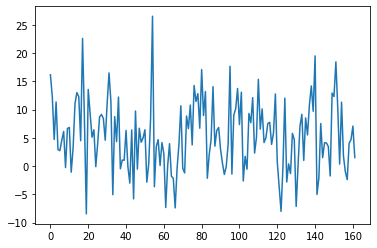

In [94]:
plt.plot(list_canonicite)

plt.show()

In [95]:
path_name_non_canon = r"test_chunk_non_canon/*.txt"

In [96]:
list_canonicite_non_canon = moulinette(path_name_non_canon, coef_fabula)

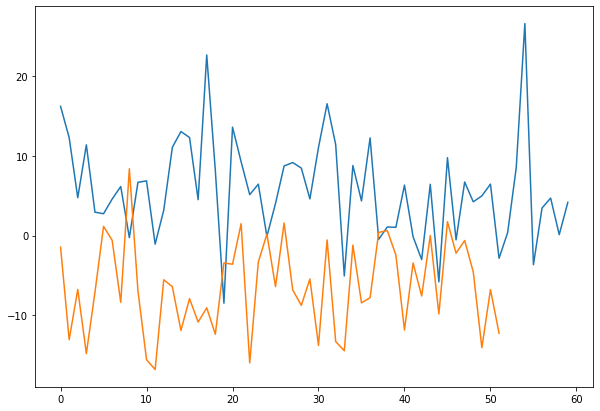

In [106]:
plt.figure(figsize=(10,7))
plt.plot(list_canonicite[0:60])
plt.plot(list_canonicite_non_canon)

plt.show()

In [111]:
best_flaubert = "- barthélemy est louée par les mêmes raisons que les massacres de septembre et que la faction des seize sous la ligue est exaltée au même titre que le comité de salut public dans ces divers événements l’ auteur voit l’ application d’ un principe qu’ il affirme être commun au catholicisme et à la révolution la « souveraineté du peuple c’ est même par là que le catholicisme se distingue à ses yeux du protestantisme fondé sur l’ individualisme sur la « souveraineté du moi thureau - dangin histoire de la monarchie de juillet t. vi p. qui après tout défendaient le peuple et il appelait la ligue « l’ aurore de la démocratie un grand mouvement égalitaire contre l’ individualisme des protestants frédéric était un peu surpris par ces idées elles ennuyaient cisy probablement car il mit la conversation sur les tableaux vivants du gymnase qui attiraient alors beaucoup de monde sénécal s’ en affligea de tels spectacles corrompaient les filles du prolétaire puis on les voyait étaler un luxe insolent aussi approuvait -il les étudiants bavarois qui avaient outragé lola montèslola montès était la célèbre favorite du roi de bavière à l’ instar de rousseau il faisait plus de cas de la femme d’ un charbonnier que de la maîtresse d’ un roi – vous blaguez les truffes répliqua majestueusement hussonnet et il prit la défense de ces dames en faveur de rosanette puis comme il parlait de son bal et du costume d’ arnoux – on prétend qu’ il branle dans le manche dit pellerin le marchand de tableaux venait d’ avoir un procès pour ses terrains de belleville et il était actuellement dans une compagnie de kaolin bas-breton avec d’ autres farceurs de son espèce dussardier en savait davantage car son patron à lui m. moussinot ayant été aux informations sur arnoux près du banquier oscar lefebvre celui-ci avait répondu qu’ il le jugeait peu solide connaissant quelques-uns de ses renouvellements le dessert était fini on passa dans le salon tendu comme celui de la maréchale en damas jaune et de style louis xvi pellerin blâma frédéric de n’ avoir pas choisi plutôt le style néo - grec sénécal frotta des allumettes contre les tentures deslauriers ne fit aucune observation il en fit dans la bibliothèque qu’ il appela une bibliothèque de petite fille la plupart des littérateurs contemporains s’ y trouvaient il fut impossible de parler de leurs ouvrages car hussonnet immédiatement contait des anecdotes sur leurs personnes critiquait leurs figures leurs mœurs leur costume exaltant les esprits de ordre dénigrant ceux du premier et déplorant bien entendu la décadence moderne telle chansonnette de villageois contenait à elle seule plus de poésie que tous les lyriques du xixe siècle balzac était surfait byron démoli hugo n’ entendait rien au théâtre etc. – pourquoi donc dit sénécal n’ avez -vous pas les volumes de nos poètes ouvriers et m. de cisy qui s’ occupait de littérature s’ étonna de ne pas voir sur la table de frédéric « quelques - unes de ces physiologies nouvelles physiologie du fumeur du pêcheur à la ligne de l’ employé de barrière ils arrivèrent à l’ agacer tellement qu’ il eut envie de les pousser dehors par les épaules « mais je deviens bête et prenant dussardier à l’ écart il lui demanda s’ il pouvait le servir en quelque chose le brave garçon fut attendri avec sa place de caissier il n’ avait besoin de rien ensuite frédéric emmena deslauriers dans sa chambre et tirant de son secrétaire francs – tiens mon brave empoche c’ est le reliquat de mes vieilles dettes – mais et le journal dit l’ avocat j’ en ai parlé à hussonnet tu sais bien et frédéric ayant répondu qu’ il se trouvait « un peu gêné maintenant l’ autre eut un mauvais sourire après les liqueurs on but de la bière après la bière des grogs on refuma des pipes enfin à heures du soir tous s’ en allèrent et ils marchaient les uns près des autres sans parler quand dussardier se mit à dire que frédéric les avait reçus parfaitement tous en convinrent hussonnet déclara son déjeuner un peu trop lourd sénécal critiqua la futilité de son intérieur cisy pensait de même cela manquait de « cachet absolument – moi je trouve dit pellerin qu’ il aurait bien pu me commander un tableau deslauriers se taisait en tenant dans la poche de son pantalon ses billets de banque frédéric était resté seul il pensait à ses amis et sentait entre eux et lui comme un grand fossé plein d’ ombre qui les séparait il leur avait tendu la main cependant et ils n’ avaient pas répondu à la franchise de son cœur il se rappela les mots de pellerin et de dussardier sur arnoux c’ était une invention une calomnie sans doute mais pourquoi et il aperçut mme arnoux ruinée pleurant vendant ses meubles cette idée le tourmenta toute la nuit le lendemain il se présenta chez elle ne sachant comment s’ y prendre pour communiquer ce qu’ il savait il lui demanda en manière de conversation si arnoux avait toujours ses terrains de belleville – oui toujours – il est maintenant dans une compagnie pour du kaolin de bretagne je crois – c’ est vrai – sa fabrique marche très bien n’ est -ce pas – mais je le suppose et comme il hésitait – qu’ avez -vous donc vous me faites peur il lui apprit l’ histoire des renouvellements elle baissa la tête et dit – je m’ en doutais en effet arnoux pour faire une bonne spéculation s’ était refusé à vendre ses terrains avait emprunté dessus largement et ne trouvant point d’ acquéreurs avait cru se rattraper par l’ établissement d’ une manufacture les frais avaient dépassé les devis elle n’ en savait pas davantage il éludait toute question et affirmait continuellement que ça allait très bien frédéric tâcha de la rassurer c’ étaient peut - être des"

In [115]:
txt_colored = close_reading_analysis(best_flaubert, coef_canon, coef_non_canon)

nb_canon =  262 
 nb_non_canon =  287


In [117]:
print(txt_colored)

- barthélemy est louée par les mêmes raisons que les massacres de septembre et que la faction des seize sous la ligue est exaltée au même titre que le comité de salut public dans ces divers événements l ’ auteur voit l ’ application d ’ un principe qu ’ il affirme être commun au catholicisme et à la révolution la « souveraineté du peuple c ’ est même par là que le catholicisme se distingue à ses yeux du protestantisme fondé sur l ’ individualisme sur la « souveraineté du moi thureau - dangin histoire de la monarchie de juillet t. vi p. qui après tout défendaient le peuple et il appelait la ligue « l ’ aurore de la démocratie un grand mouvement égalitaire contre l ’ individualisme des protestants frédéric était un peu surpris par ces idées elles ennuyaient cisy probablement car il mit la conversation sur les tableaux vivants du gymnase qui attiraient alors beaucoup de monde sénécal s ’ en affligea de tels spectacles corrompaient les filles du prolétaire puis 

In [125]:
print(close_reading_analysis(colette_sido_extract, coef_canon, coef_non_canon))

nb_canon =  182 
 nb_non_canon =  138
– et pourquoi cesserais -je d’ être de mon village ? il n’ y faut pas compter . te voilà bien fière , mon pauvre minet - chéri , parce que tu habites paris depuis ton mariage . je ne peux pas m’ empêcher de rire en constatant combien tous les parisiens sont fiers d’ habiter paris , les vrais parce qu’ ils assimilent cela à un titre nobiliaire , les faux parce qu’ ils s’ imaginent avoir monté en grade . à ce compte - là , je pourrais me vanter que ma mère est née boulevard bonne-nouvelle ! toi , te voilà comme le pou sur ses pieds de derrière parce que tu as épousé un parisien . et quand je dis un parisien ... les vrais parisiens d’ origine ont moins de caractère dans la physionomie . on dirait que paris les efface !   elle s’ interrompait , levait le rideau de tulle qui voilait la fenêtre :   – ah ! voici mlle thévenin qui promène en triomphe , dans toutes les rues , sa cousine de paris . elle n’ a pas besoin de le dire , que cet

In [128]:
coef_canon

['avoir',
 'm.',
 'pâle',
 'joie',
 'qui',
 'histoire',
 'large',
 'manquer',
 'son',
 'aussitôt',
 'dîner',
 'sous',
 'nul',
 'mine',
 'bientôt',
 'baiser',
 'oeil',
 'apercevoir',
 'plusieurs',
 'lentement',
 'dent',
 'depuis',
 'mon',
 'cependant',
 'haut',
 'juge',
 'feuille',
 'rare',
 'brusquement',
 'simple',
 'devoir',
 'colère',
 'sang',
 'arme',
 'poste',
 'émotion',
 '-t',
 'ignorer',
 'frapper',
 'prier',
 'fuir',
 'gris',
 'celui-ci',
 'aprè',
 'paul',
 'même',
 'ici',
 'pour',
 'certainement',
 'oreille',
 'votre',
 'confiance',
 'arrêter',
 'douleur',
 'était',
 'jouer',
 'homme',
 'personnage',
 'faute',
 'visage',
 'murmurer',
 'heureux',
 'françai',
 'sauvage',
 'immense',
 'tard',
 'comment',
 'plaisir',
 'louis',
 'objet',
 'disparaître',
 'partout',
 'affaire',
 'entrer',
 'arrière',
 'ceci',
 'après',
 'sac',
 'arrêta',
 'marcher',
 'arrive',
 'j’',
 'mlle',
 'léger',
 'bon',
 'peur',
 'apporter',
 'diriger',
 'laisse',
 'hasard',
 'fils',
 'rencont

In [127]:
coef_non_canon

['expliquer',
 'chair',
 'bête',
 'pense',
 'répondre',
 'rôle',
 'idée',
 'propre',
 'à-dire',
 'presque',
 'valoir',
 'êter',
 'perdre',
 'jour',
 'soirée',
 'pousser',
 'passion',
 'convenir',
 'luire',
 'sur',
 'commissaire',
 'préser',
 'agir',
 'amour',
 'occasion',
 'première',
 'robert',
 'regarder',
 'question',
 'soutenir',
 'place',
 'lieu',
 'au-dessus',
 'secret',
 'don',
 'forêt',
 'ordre',
 'mauvais',
 'exemple',
 'vieux',
 'froid',
 'croire',
 'écrit',
 'simplement',
 'car',
 'côté',
 'trouver',
 'pluie',
 'demande',
 'grâce',
 'ça',
 'quitter',
 'aujourd’hui',
 'près',
 'refuser',
 'mais',
 'pas',
 'mouvement',
 'entrée',
 'ville',
 'pauline',
 'descendre',
 'pitié',
 'bord',
 'juger',
 'mme',
 'éter',
 'donné',
 'père',
 'seul',
 'main',
 'escalier',
 'contre',
 'sentiment',
 'ou',
 'colonel',
 'ton',
 'paysan',
 'doute',
 'gens',
 'habit',
 'chemin',
 'siècle',
 'fauteuil',
 'arrêté',
 'jeanne',
 'remercier',
 'mot',
 'conversation',
 'sombre'